In [151]:
import matplotlib.pyplot as plt
import numpy as np

In [152]:
def readFile(fileName):
    data = np.genfromtxt(fileName, delimiter=',')
    data = np.delete(data, 0, axis = 0)
    data = np.delete(data, 0, axis = 1)
    return data

In [153]:
trainData = readFile("lab_1_train.csv")
print(trainData)

[[0.00000000e+00 2.01490142e+01]
 [1.01010101e-02 1.99787227e+01]
 [2.02020202e-02 2.02347106e+01]
 [3.03030303e-02 2.05175150e+01]
 [4.04040404e-02 2.00105621e+01]
 [5.05050505e-02 2.00307690e+01]
 [6.06060606e-02 2.05949760e+01]
 [7.07070707e-02 2.03716446e+01]
 [8.08080808e-02 2.00207738e+01]
 [9.09090909e-02 2.03445862e+01]
 [1.01010101e-01 2.00629949e+01]
 [1.11111111e-01 2.00825033e+01]
 [1.21212121e-01 2.03150129e+01]
 [1.31313131e-01 1.96886422e+01]
 [1.41414141e-01 1.97653529e+01]
 [1.51515152e-01 2.01343440e+01]
 [1.61616162e-01 2.00193830e+01]
 [1.71717172e-01 2.04377085e+01]
 [1.81818182e-01 2.00912291e+01]
 [1.91919192e-01 1.99601473e+01]
 [2.02020202e-01 2.08437350e+01]
 [2.12121212e-01 2.03565095e+01]
 [2.22222222e-01 2.04647029e+01]
 [2.32323232e-01 2.00372220e+01]
 [2.42424242e-01 2.03215337e+01]
 [2.52525253e-01 2.05383273e+01]
 [2.62626263e-01 2.01799545e+01]
 [2.72727273e-01 2.06581640e+01]
 [2.82828283e-01 2.03854650e+01]
 [2.92929293e-01 2.04983505e+01]
 [3.030303

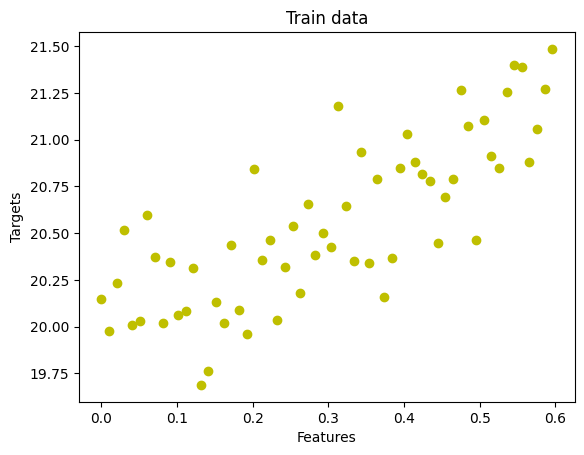

In [154]:
plt.title("Train data")
plt.xlabel("Features")
plt.ylabel("Targets")
plt.plot(trainData[:, 0], trainData[:, 1], 'yo')

In [155]:
def lossFunc(b0, b1, data):    
    squareDiff = np.array([(data[i, 1] - linearRegFunc(b0, b1, data[i, 0])) ** 2 for i in range(data.shape[0])])
    return squareDiff.sum() / data.shape[0]

In [156]:
def linearRegFunc(b0, b1, x):
    return b0 + b1 * x

In [157]:
def train(data):
    tolerance = 0.00001
    learningRate = 0.01
    
    b0 = float(np.random.randn(1))
    b1 = float(np.random.randn(1))
    
    loss = lossFunc(b0, b1, data)
    previousLoss = np.max(data)
    delta = abs(previousLoss - loss)
    
    counter = 0
    while (delta > tolerance):
        b0Derivative = np.array([data[i, 1] - linearRegFunc(b0, b1, data[i, 0]) for i in range(data.shape[0])])
        b1Derivative = np.array([b0Derivative[i] * data[i, 0] for i in range(data.shape[0])])
        b0Derivative = -2 / data.shape[0] * b0Derivative.sum()
        b1Derivative = -2 / data.shape[0] * b1Derivative.sum()
        b0 = b0 - learningRate  * b0Derivative
        b1 = b1 - learningRate  * b1Derivative
    
        previousLoss = loss
        loss = lossFunc(b0, b1, data)
        delta = abs(previousLoss - loss)
        print("Epoch %s: beta0 = %s; beta1 = %s; Loss function value = %s;" % (counter, b0, b1, loss))
        counter += 1
        
    return (b0, b1, loss)


In [158]:
(b0, b1, loss) = train(trainData)

Epoch 0: beta0 = 1.323399045713974; beta1 = -2.6376944234204287; Loss function value = 401.2110911857506;
Epoch 1: beta0 = 1.7236419216489287; beta1 = -2.515604789576633; Loss function value = 383.8921632212212;
Epoch 2: beta0 = 2.1151523351766204; beta1 = -2.396191973484164; Loss function value = 367.32102556156934;
Epoch 3: beta0 = 2.4981208882974495; beta1 = -2.2793975413518455; Loss function value = 351.4653903307407;
Epoch 4: beta0 = 2.872734022730023; beta1 = -2.1651643348306338; Loss function value = 336.29436376943346;
Epoch 5: beta0 = 3.2391741107179097; beta1 = -2.0534364431744523; Loss function value = 321.77838604032047;
Epoch 6: beta0 = 3.59761954385435; beta1 = -1.944159176008673; Loss function value = 307.8891736323447;
Epoch 7: beta0 = 3.9482448199681848; beta1 = -1.8372790366929839; Loss function value = 294.5996642518656;
Epoch 8: beta0 = 4.291220628113316; beta1 = -1.7327436962656662; Loss function value = 281.88396409328;
Epoch 9: beta0 = 4.626713931703099; beta1 = 

In [159]:
print("Final weights: beta0 = %s, beta1 = %s; loss: %s" %(b0, b1, loss))
testData = readFile("lab_1_test.csv")
print("Loss for test dataset: %s" %(lossFunc(b0, b1, testData)))


Final weights: beta0 = 19.794797314356714, beta1 = 2.517404988145443; loss: 0.0819340978710993
Loss for test dataset: 0.126530095305813


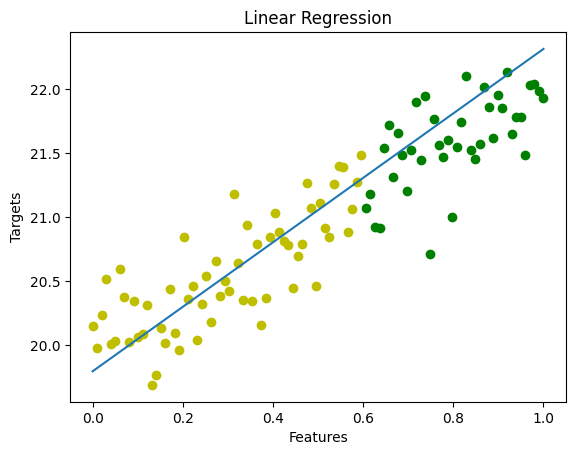

In [160]:
plt.plot(trainData[:, 0], trainData[:, 1], 'yo', testData[:, 0], testData[:, 1], 'go', [0, 1], [linearRegression(b0, b1, 0), linearRegression(b0, b1, 1)])

plt.title("Linear Regression")
plt.xlabel("Features")
plt.ylabel("Targets")

plt.show()